# Gadget Scanning Results

## Import Dataset

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

gadgets = pd.read_csv('../call_targets/all-gadgets-reasoned.csv', sep=";")
tfps = pd.read_csv('../call_targets/all-tfps.csv', sep=";")


/tmp/ipykernel_36499/2838850735.py:4: DtypeWarning: Columns (24,25,28,31,32,49,50,74,75,82,99,100,106,124,125,131,132,173) have mixed types. Specify dtype option on import or set low_memory=False.
  gadgets = pd.read_csv('../call_targets/all-gadgets-reasoned.csv', sep=";")


## General Stats

In [17]:

print(f"gadgets: {gadgets.count()[0]}")
print(f"    unique pcs: {gadgets['pc'].nunique()}")
print(f"    unique names: {gadgets['name'].nunique()}")

print(f"tfps: {tfps.count()[0]}")
print(f"    unique pcs: {tfps['pc'].nunique()}")
print(f"    unique names: {tfps['name'].nunique()}")

exploitable = gadgets.query("exploitable == True & base_has_indirect_secret_dependency == False")
print(f"exploitable gadgets: {exploitable.count()[0]}")
print(f"    unique pcs: {exploitable['pc'].nunique()}")
print(f"    unique names: {exploitable['name'].nunique()}")

exploitable_w_branches = gadgets.query("exploitable_w_branches == True & base_has_indirect_secret_dependency == False")
print(f"exploitable gadgets (including branches): {exploitable_w_branches.count()[0]}")
print(f"    unique pcs: {exploitable_w_branches['pc'].nunique()}")
print(f"    unique names: {exploitable_w_branches['name'].nunique()}")


gadgets: 119703
    unique pcs: 39530
    unique names: 19295
tfps: 8179
    unique pcs: 3685
    unique names: 4446
exploitable gadgets: 4042
    unique pcs: 959
    unique names: 842
exploitable gadgets (including branches): 3976
    unique pcs: 947
    unique names: 833


/tmp/ipykernel_36499/2425584282.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"gadgets: {gadgets.count()[0]}")
/tmp/ipykernel_36499/2425584282.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"tfps: {tfps.count()[0]}")
/tmp/ipykernel_36499/2425584282.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"exploitable gadgets: {exploitable.count()[0]}")
/tmp/ipykernel_36499/2425584282.py:15: FutureWarning:

## Exploitable Gadgets

In [3]:
df1 = exploitable.groupby('name')['name'].count()
df2 = exploitable.drop_duplicates(subset=['name', 'pc']).groupby('name')['name'].count()

df = pd.DataFrame({'unique':  df2.values,
                   'total': [x-y for (x,y) in zip(df1.values, df2.values)]}, index=df1.keys())

ax = df.plot.bar(figsize=(50,10), stacked=True, xlabel="Number of gadgets", ylabel="Function name", title="Number of unique VS total gadgets per function")

for container in ax.containers:
    ax.bar_label(container)


Error in callback <function flush_figures at 0x7f52a0599d00> (for post_execute):


KeyboardInterrupt: 

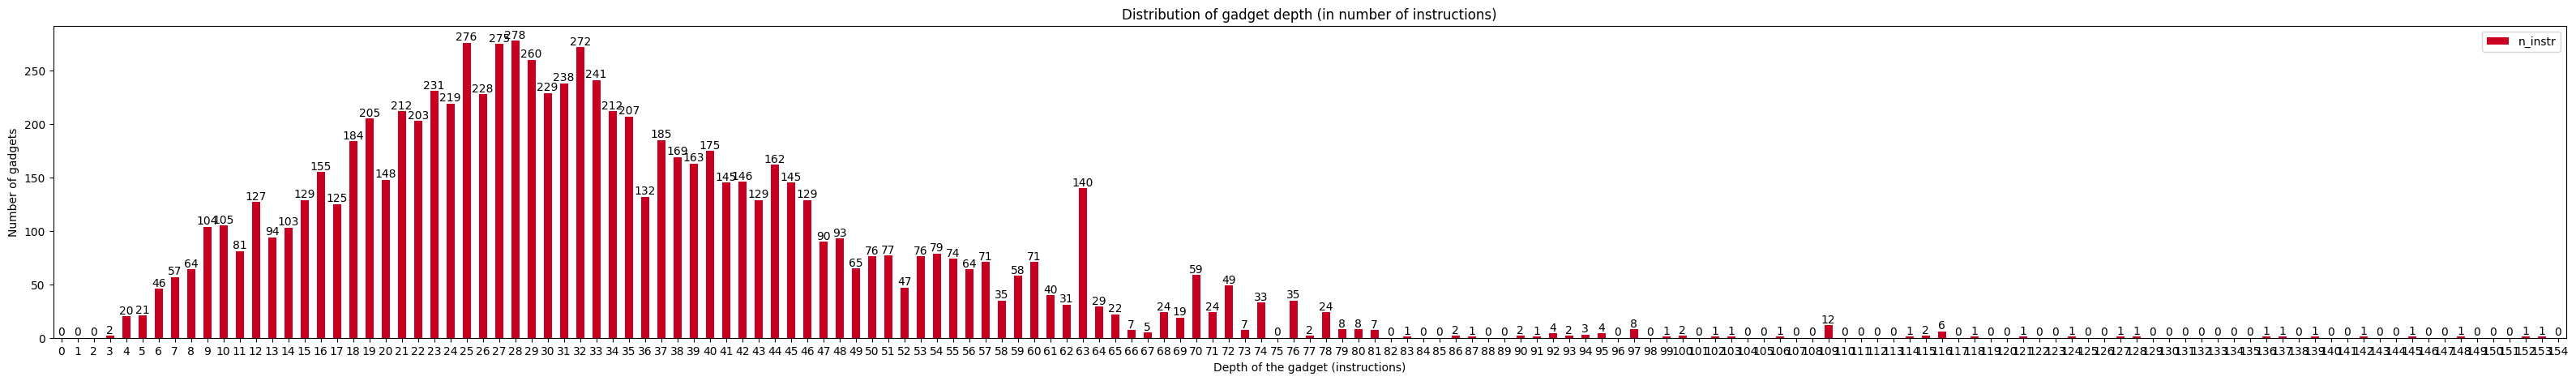

In [ ]:
df1 = exploitable.groupby('n_instr')['n_instr'].count()
xaxis = range(0,max(df1.keys() + 2))

df = pd.DataFrame({'n_instr': [0 if x not in df1.keys() else df1[x] for x in xaxis]}, index=xaxis)

ax = df.plot.bar(rot=0,figsize=(40,5), xlabel="Depth of the gadget (instructions)", ylabel="Number of gadgets", title="Distribution of gadget depth (in number of instructions)")

for container in ax.containers:
    ax.bar_label(container)


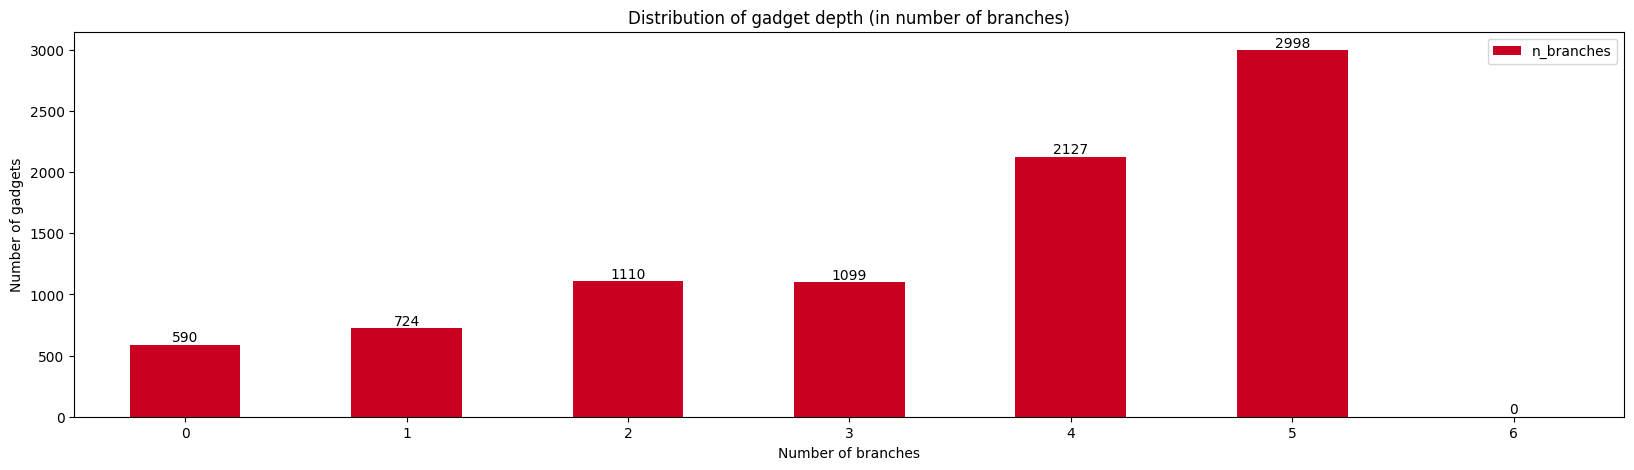

In [ ]:
df1 = exploitable.groupby('n_branches')['n_branches'].count()
xaxis = range(0,max(df1.keys() + 2))

df = pd.DataFrame({'n_branches': [0 if x not in df1.keys() else df1[x] for x in xaxis]}, index=xaxis)

ax = df.plot.bar(rot=0,figsize=(20,5), xlabel="Number of branches", ylabel="Number of gadgets", title="Distribution of gadget depth (in number of branches)")

for container in ax.containers:
    ax.bar_label(container)


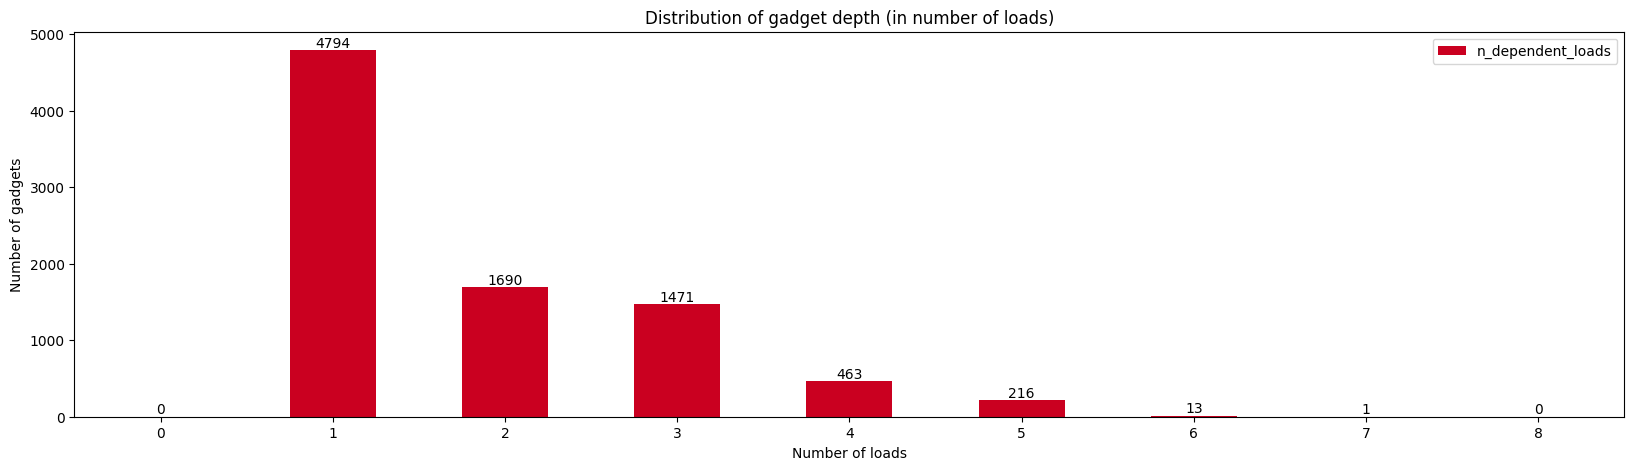

In [ ]:
df1 = exploitable.groupby('n_dependent_loads')['n_dependent_loads'].count()
xaxis = range(0,max(df1.keys() + 2))

df = pd.DataFrame({'n_dependent_loads': [0 if x not in df1.keys() else df1[x] for x in xaxis]}, index=xaxis)

ax = df.plot.bar(rot=0,figsize=(20,5), xlabel="Number of loads", ylabel="Number of gadgets", title="Distribution of gadget depth (in number of loads)")

for container in ax.containers:
    ax.bar_label(container)


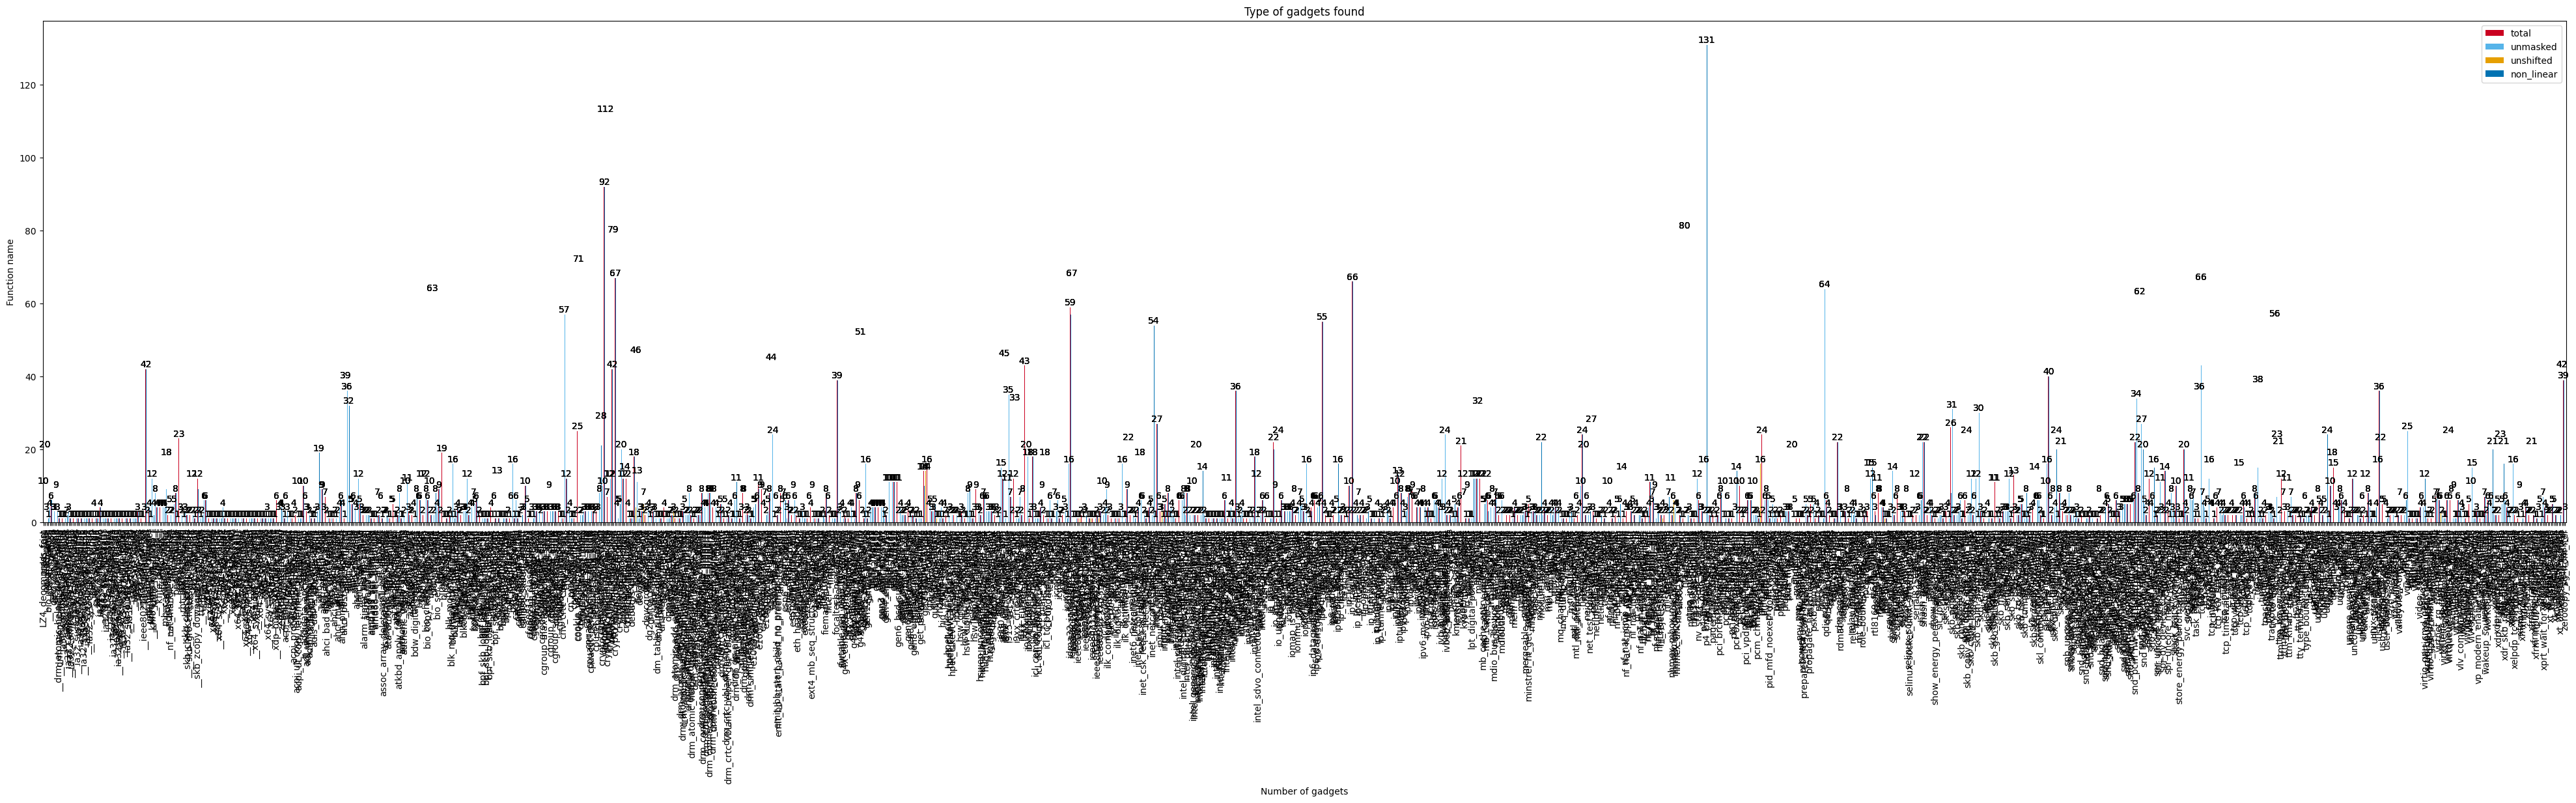

In [ ]:
tot = exploitable.groupby('name')['name'].count()
unshifted = exploitable.query('is_secret_below_cache_granularity == True').groupby('name')['name'].count()
unmasked = exploitable.query('is_secret_entropy_high == True or is_max_secret_too_high == True').groupby('name')['name'].count()
non_linear = exploitable.query('n_branches > 0').groupby('name')['name'].count()


df = pd.DataFrame({
                    'total':  tot.values,
                   'unmasked':  [0 if x not in unmasked.keys() else unmasked[x] for x in tot.keys()],
                   'unshifted':  [0 if x not in unshifted.keys() else unshifted[x] for x in tot.keys()],
                   'non_linear':  [0 if x not in non_linear.keys() else non_linear[x] for x in tot.keys()],
                   }, index=tot.keys())

df.sort_index(ascending=True)
ax = df.plot.bar(figsize=(50,10), stacked=False, xlabel="Number of gadgets", ylabel="Function name", title="Type of gadgets found")

for container in ax.containers:
    ax.bar_label(ax.containers[0])


## TFPS

In [ ]:
df1 = tfps.groupby('name')['name'].count()
df2 = tfps.drop_duplicates(subset=['name', 'pc']).groupby('name')['name'].count()

df = pd.DataFrame({'unique':  df2.values,
                   'total': [x-y for (x,y) in zip(df1.values, df2.values)]}, index=df1.keys())

ax = df.plot.barh(figsize=(10,50), stacked=True, xlabel="Number of tfps", ylabel="Function name", title="Number of unique VS total tfps per function")

for container in ax.containers:
    ax.bar_label(container)


Error in callback <function flush_figures at 0x7f7ad6a6d6c0> (for post_execute):


KeyboardInterrupt: 

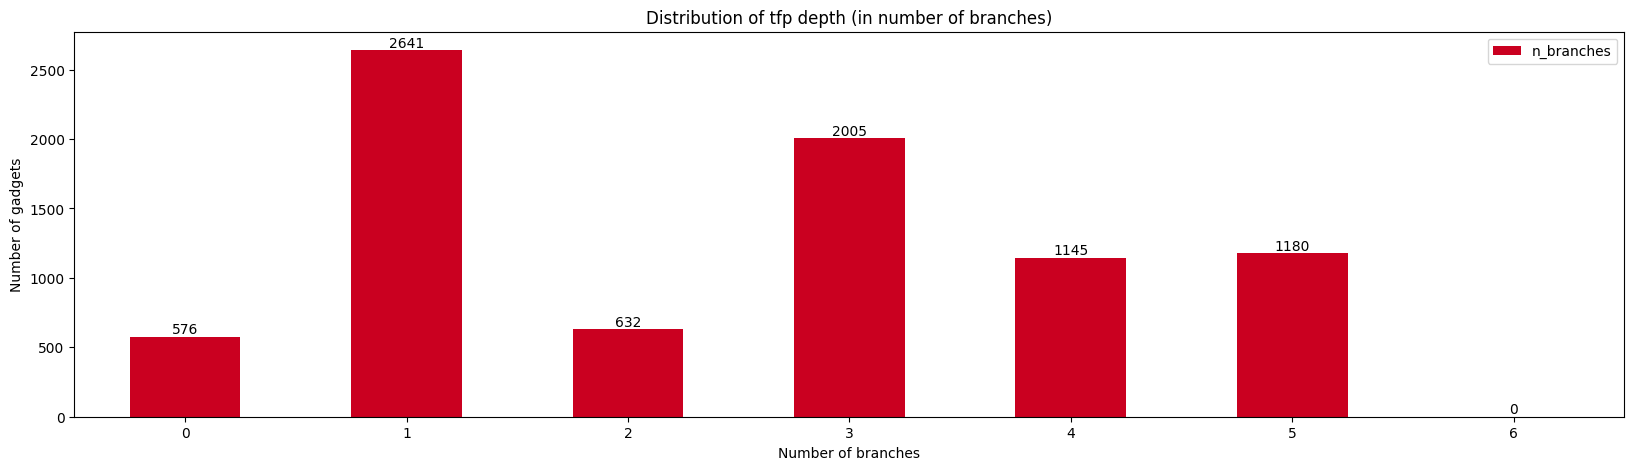

In [ ]:
df1 = tfps.groupby('n_branches')['n_branches'].count()
xaxis = range(0,max(df1.keys() + 2))

df = pd.DataFrame({'n_branches': [0 if x not in df1.keys() else df1[x] for x in xaxis]}, index=xaxis)

ax = df.plot.bar(rot=0,figsize=(20,5), xlabel="Number of branches", ylabel="Number of gadgets", title="Distribution of tfp depth (in number of branches)")

for container in ax.containers:
    ax.bar_label(container)


In [ ]:
df1 = tfps.groupby('n_instr')['n_instr'].count()

if type(df1.keys()[0]) == str:
    keys =[int(x, 16) for x in df1.keys()]

xaxis = range(0,max(keys) + 2)

df = pd.DataFrame({'n_instr': [0 if x not in keys else df1[hex(x)] for x in xaxis]}, index=xaxis)

ax = df.plot.bar(rot=0,figsize=(40,5), xlabel="Depth of the gadget (instructions)", ylabel="Number of gadgets", title="Distribution of gadget depth (in number of instructions)")

for container in ax.containers:
    ax.bar_label(container)


NameError: name 'keys' is not defined

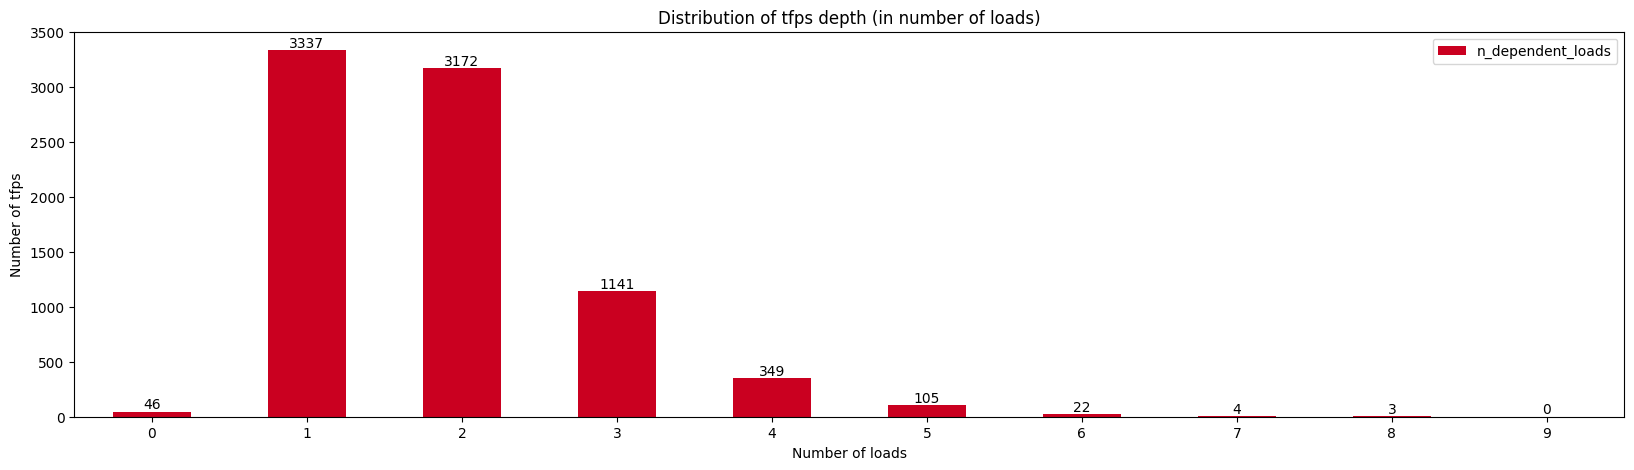

In [ ]:
df1 = tfps.groupby('n_dependent_loads')['n_dependent_loads'].count()
xaxis = range(0,max(df1.keys() + 2))

df = pd.DataFrame({'n_dependent_loads': [0 if x not in df1.keys() else df1[x] for x in xaxis]}, index=xaxis)

ax = df.plot.bar(rot=0,figsize=(20,5), xlabel="Number of loads", ylabel="Number of tfps", title="Distribution of tfps depth (in number of loads)")

for container in ax.containers:
    ax.bar_label(container)


## Cumulative distributions

In [18]:
import numpy as np
from cycler import cycler
import scienceplots

# line_colors = ['#0571b0', '#ca0020', '#f4a582']

# line cyclers adapted to colourblind people
line_cycler   = (cycler(color=[ "#ca0020",  "#56B4E9", "#E69F00","#0072B2", "#D55E00", "#CC79A7", "#F0E442"]) +
                 cycler(linestyle=["--", "-.", "-", ":", "-", "--", "-."]))
marker_cycler = (cycler(color=[ "#ca0020", "#56B4E9", "#E69F00","#0072B2", "#D55E00", "#CC79A7", "#F0E442"]) +
                 cycler(linestyle=["none", "none", "none", "none", "none", "none", "none"]) +
                 cycler(marker=["4", "2", "3", "1", "+", "x", "."]))

# matplotlib's standard cycler
standard_cycler = cycler("color", ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"])

plt.rc("axes", prop_cycle=line_cycler)


In [19]:
ctfps = pd.read_csv('../call_targets/all-tfps.csv', sep=";")
jgadgets = pd.read_csv('../jump_targets/all-gadgets-reasoned.csv', sep=";")
jtfps = pd.read_csv('../jump_targets/all-tfps.csv', sep=";")

reachable = pd.read_csv('../lists/reachable_functions_6.6-rc4.txt')
reachable = list(reachable['name'].values)


/tmp/ipykernel_36499/967129311.py:2: DtypeWarning: Columns (24,25,32,49,50,99,100,106,124,125) have mixed types. Specify dtype option on import or set low_memory=False.
  jgadgets = pd.read_csv('../jump_targets/all-gadgets-reasoned.csv', sep=";")


(959, 233)
(296, 233)
(7871, 233)
(1042, 233)


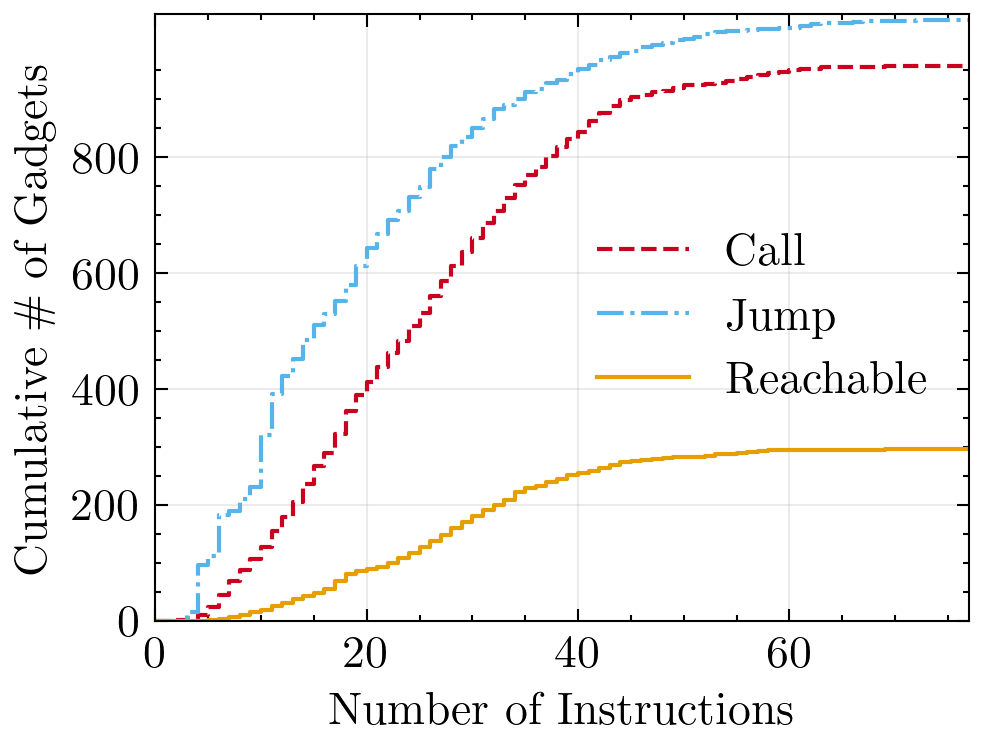

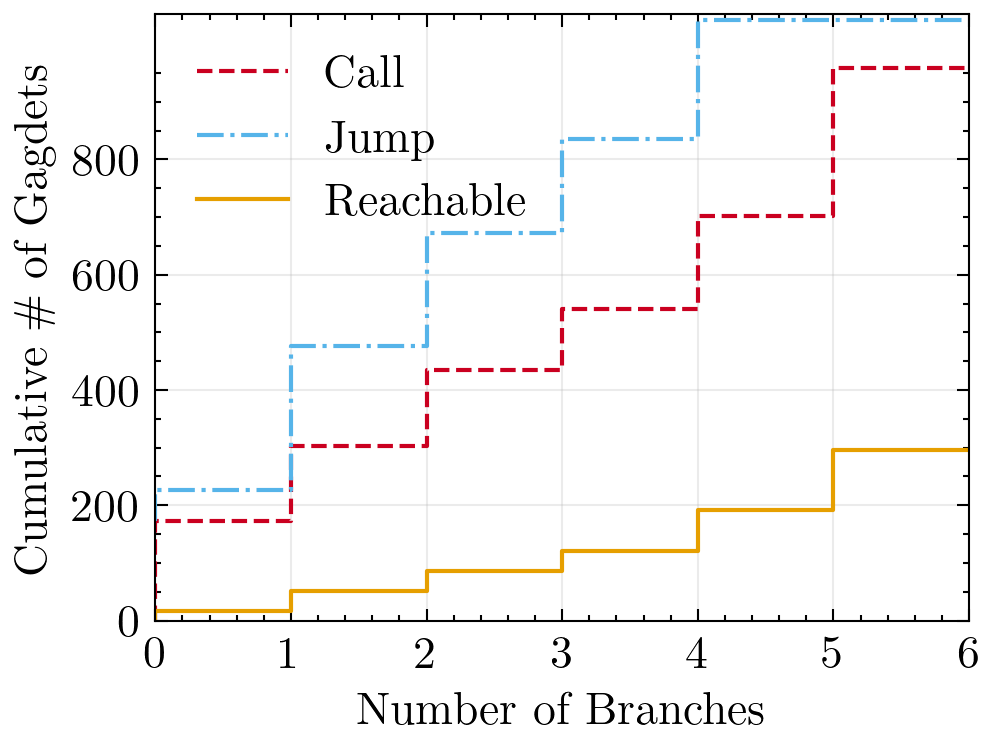

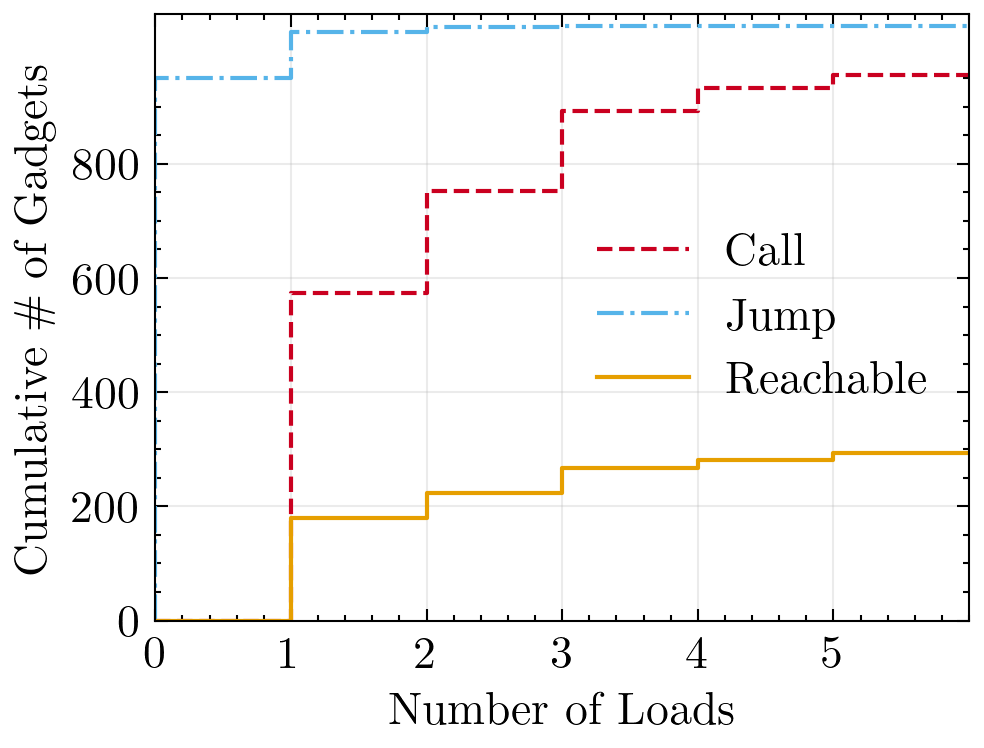

In [25]:


exploitable_unique_pcs = exploitable.drop_duplicates(subset=['pc'])
print(exploitable_unique_pcs.shape)

reachable_unique_pcs = exploitable[exploitable['name'].isin(reachable)]
reachable_unique_pcs = reachable_unique_pcs.drop_duplicates(subset=['pc'])
print(reachable_unique_pcs.shape)

jump_gadgets = jgadgets[jgadgets['exploitable'] == 1]
print(jump_gadgets.shape)
jump_gadgets = jump_gadgets.drop_duplicates(subset=['pc'])
print(jump_gadgets.shape)

# csfont = {'fontname':'JetBrains Mono'}
# csfont = {'fontname':'Computer Mono'}

df1 = exploitable_unique_pcs.groupby('n_instr')['n_instr'].count()
x = range(0,max(df1.keys() ))
vals = [0 if p not in df1.keys() else df1[p] for p in x]
y = np.cumsum(vals)

df2 = reachable_unique_pcs.groupby('n_instr')['n_instr'].count()
vals2 = [0 if p not in df2.keys() else df2[p] for p in x]
y2 = np.cumsum(vals2)

df3 = jump_gadgets.groupby('n_instr')['n_instr'].count()
vals3 = [0 if p not in df3.keys() else df3[p] for p in x]
y3 = np.cumsum(vals3)

# df = pd.DataFrame())
# plt.title("Sports Watch Data")
# plt.xlabel("Average Pulse")
# plt.ylabel("Calorie Burnage")
plt.rcParams.update({'font.size': 11})
plt.style.use(['science'])


fig = plt.figure(dpi=300)
ax = fig.add_subplot(1, 1, 1)
ax.set_prop_cycle(line_cycler)
ax.step(x, y)
ax.step(x, y3)
ax.step(x, y2)

# ax.xaxis.set_tick_params(labelsize=16)
# ax.yaxis.set_tick_params(labelsize=16)

ax.set_xlabel('Number of Instructions')
ax.set_ylabel('Cumulative \# of Gadgets')
ax.legend(['Call', 'Jump', 'Reachable'])



# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(0, max(x), 20)
minor_ticks = np.arange(0, max(x), 5)
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)

major_ticks = np.arange(0, max(y), 200)
minor_ticks = np.arange(0, max(y), 50)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.set_xlim(xmin=0, xmax=max(x))
ax.set_ylim(ymin=0, ymax=max(y3) + 10)

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0)
ax.grid(which='major', alpha=0.25)

fig.savefig('cdf_base_instr.pdf')
plt.show()


# -------------------------- BRANCHES ---------------------------------------

df1 = exploitable_unique_pcs.groupby('n_branches')['n_branches'].count()
x = range(0,max(df1.keys())+2)
vals = [0 if p-1 not in df1.keys() else df1[p-1] for p in x]
y = np.cumsum(vals)

df2 = reachable_unique_pcs.groupby('n_branches')['n_branches'].count()
vals2 = [0 if p-1 not in df2.keys() else df2[p-1] for p in x]
y2 = np.cumsum(vals2)

df3 = jump_gadgets.groupby('n_branches')['n_branches'].count()
vals3 = [0 if p not in df3.keys() else df3[p] for p in x]
y3 = np.cumsum(vals3)

# plt.rcParams.update({'font.size': 24})

fig = plt.figure(dpi=300)
ax = fig.add_subplot(1, 1, 1)
ax.set_prop_cycle(line_cycler)

ax.step(x, y)
ax.step(x, y3)
ax.step(x, y2)

# ax.xaxis.set_tick_params(labelsize=16)
# ax.yaxis.set_tick_params(labelsize=16)

ax.set_xlabel('Number of Branches')
ax.set_ylabel('Cumulative \# of Gagdets')
ax.legend(['Call', 'Jump', 'Reachable']) #, handletextpad=0.1, bbox_to_anchor=(0.5, 0.15, 0.5, 0.5))


# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(0, max(x) + 2, 1)
ax.set_xticks(major_ticks)

major_ticks = np.arange(0, max(y), 200)
minor_ticks = np.arange(0, max(y), 50)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.set_xlim(xmin=0, xmax=max(x))
ax.set_ylim(ymin=0, ymax=max(y3) + 10)

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0)
ax.grid(which='major', alpha=0.25)

fig.savefig('cdf_base_branches.pdf')
plt.show()


# ----------------------- LOADS ---------------------------------

df1 = exploitable_unique_pcs.groupby('n_dependent_loads')['n_dependent_loads'].count()
x = range(0,max(df1.keys())+1)
vals = [0 if p-1 not in df1.keys() else df1[p-1] for p in x]
y = np.cumsum(vals)

df2 = reachable_unique_pcs.groupby('n_dependent_loads')['n_dependent_loads'].count()
vals2 = [0 if p-1 not in df2.keys() else df2[p-1] for p in x]
y2 = np.cumsum(vals2)

df3 = jump_gadgets.groupby('n_dependent_loads')['n_dependent_loads'].count()
vals3 = [0 if p not in df3.keys() else df3[p] for p in x]
y3 = np.cumsum(vals3)

# plt.rcParams.update({'font.size': 24})

fig = plt.figure( dpi=300)
ax = fig.add_subplot(1, 1, 1)
ax.set_prop_cycle(line_cycler)

ax.step(x,y)
ax.step(x,y3)
ax.step(x,y2)

ax.set_xlabel('Number of Loads')
ax.set_ylabel('Cumulative \# of Gadgets')
ax.legend(['Call', 'Jump', 'Reachable'])

# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(0, max(x), 1)
ax.set_xticks(major_ticks)

major_ticks = np.arange(0, max(y), 200)
minor_ticks = np.arange(0, max(y), 50)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)
ax.set_xlim(xmin=0, xmax=max(x))
ax.set_ylim(ymin=0, ymax=max(y3) + 20)

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0)
ax.grid(which='major', alpha=0.25)

fig.savefig('cdf_base_loads.pdf')
plt.show()



(2019, 132)
(477, 132)
(488, 132)


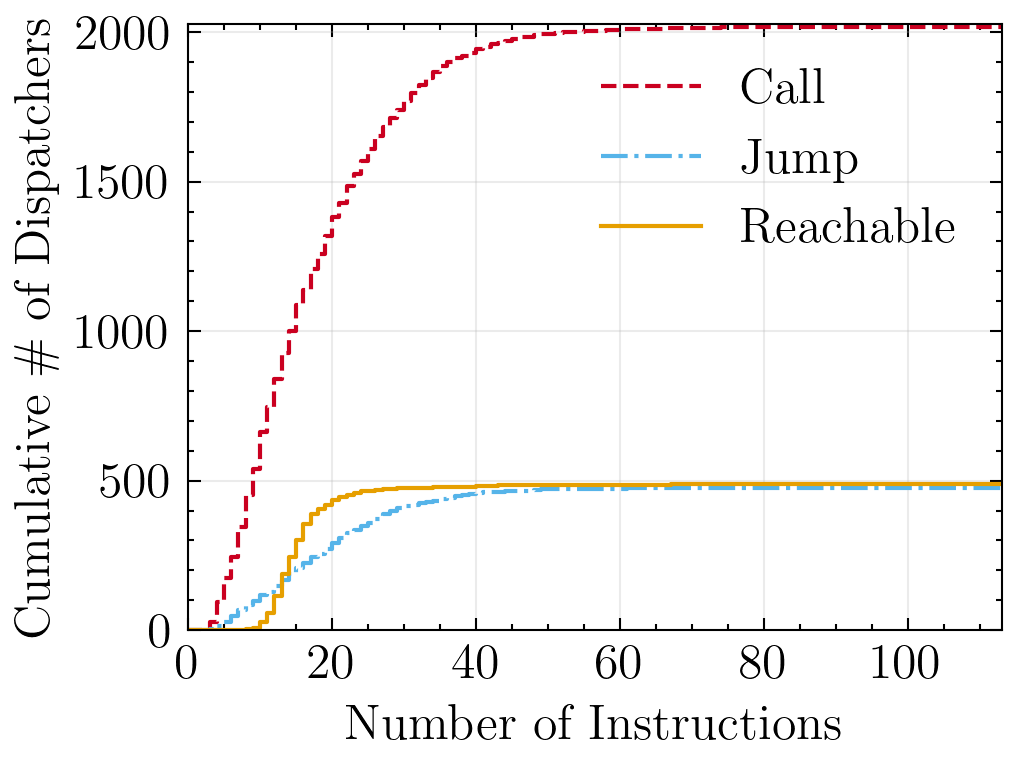

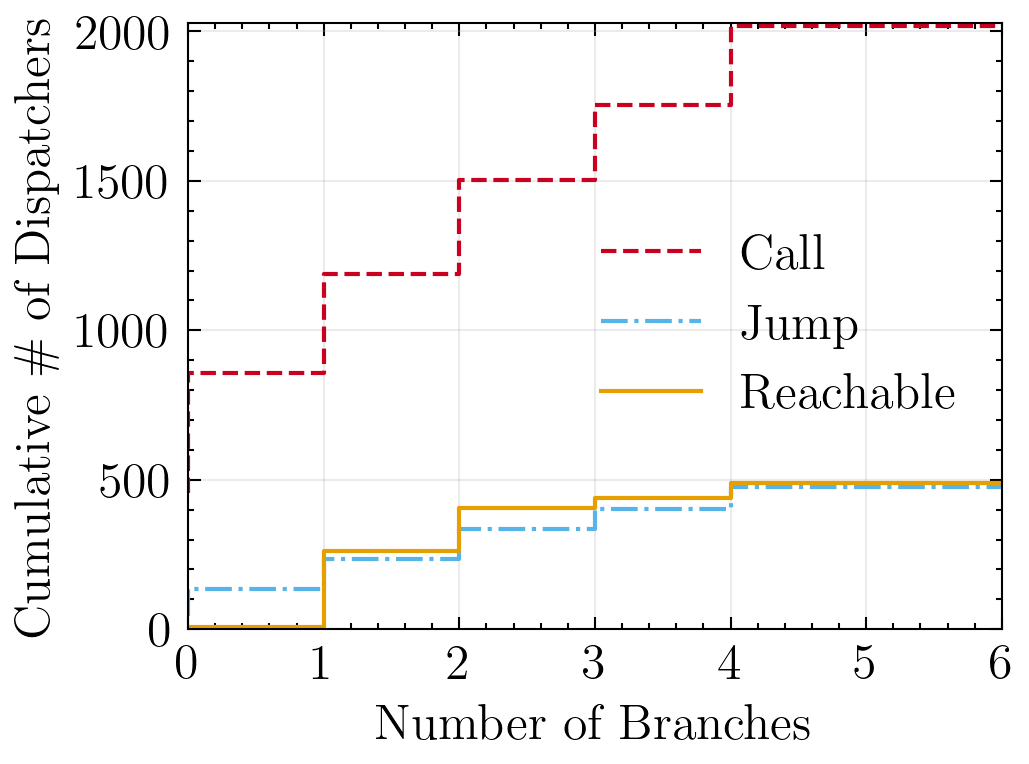

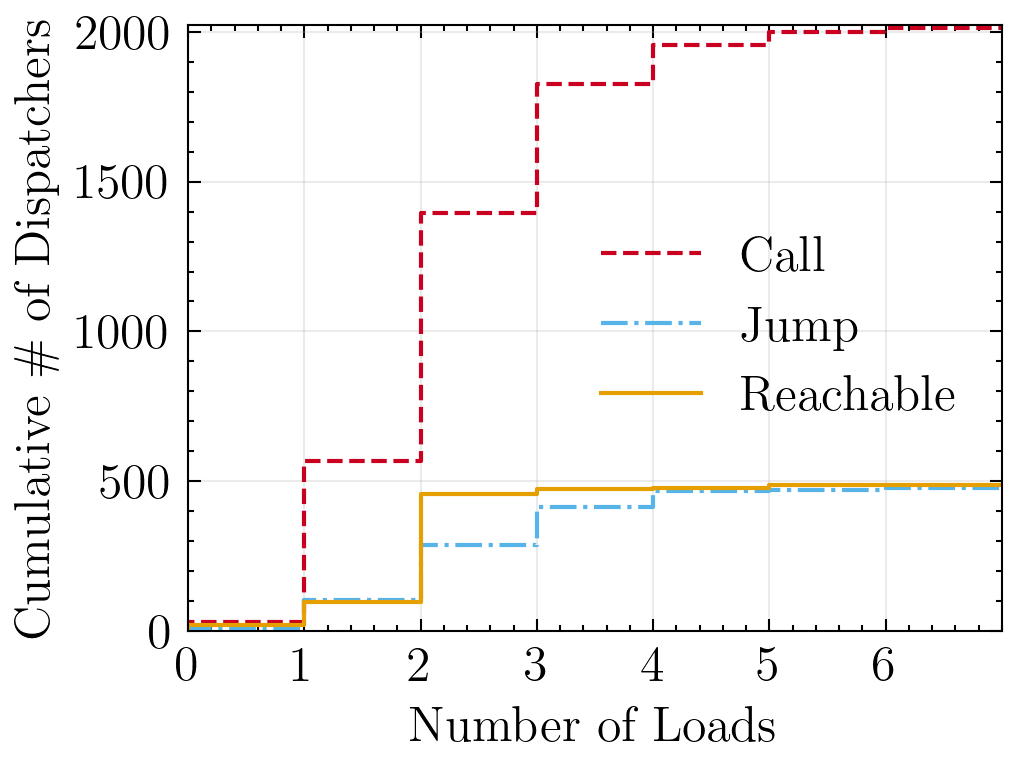

In [28]:


# MAX_VAL = 1000

# call_tfps = ctfps[ctfps['controlled'] != '[]']
call_tfps = ctfps.drop_duplicates(subset=['pc'])
call_tfps = call_tfps[call_tfps.apply(lambda x: not x['requirements'].startswith('{\'regs\': []'), axis=1)]
print(call_tfps.shape)

reachable_call_tfps = ctfps[ctfps['name'].isin(reachable)]
reachable_call_tfps = reachable_call_tfps[reachable_call_tfps.apply(lambda x: not x['requirements'].startswith('{\'regs\': []'), axis=1)]
reachable_call_tfps = reachable_call_tfps.drop_duplicates(subset=['pc'])
print(reachable_call_tfps.shape)

# jump_tfps = jtfps[ctfps['controlled'] != '[]']
jump_tfps = jtfps.drop_duplicates(subset=[ 'pc'])
jump_tfps = jump_tfps[jump_tfps.apply(lambda x: not x['requirements'].startswith('{\'regs\': []'), axis=1)]
print(jump_tfps.shape)

plt.rcParams.update({'font.size': 12})
plt.style.use(['science'])


# csfont = {'fontname':'JetBrains Mono'}
# csfont = {'fontname':'Computer Mono'}

df1 = call_tfps.groupby('n_instr')['n_instr'].count()
x = range(0,max(df1.keys() ))
vals = [0 if p not in df1.keys() else df1[p] for p in x]
y = np.cumsum(vals)

df2 = reachable_call_tfps.groupby('n_instr')['n_instr'].count()
vals2 = [0 if p not in df2.keys() else df2[p] for p in x]
y2 = np.cumsum(vals2)

df3 = jump_gadgets.groupby('n_instr')['n_instr'].count()
vals3 = [0 if p not in df3.keys() else df3[p] for p in x]
y3 = np.cumsum(vals3)

df4 = jump_tfps.groupby('n_instr')['n_instr'].count()
vals4 = [0 if p not in df4.keys() else df4[p] for p in x]
y4 = np.cumsum(vals4)


fig = plt.figure(dpi=300)
ax = fig.add_subplot(1, 1, 1)
ax.set_prop_cycle(line_cycler)

ax.step(x, y)
ax.step(x, y2)
# ax.step(x, y3)
ax.step(x, y4)

# ax.xaxis.set_tick_params(labelsize=16)
# ax.yaxis.set_tick_params(labelsize=16)

ax.set_xlabel('Number of Instructions')
ax.set_ylabel('Cumulative \# of Dispatchers')


# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(0, max(x), 20)
minor_ticks = np.arange(0, max(x), 5)
ax.set_xticks(major_ticks)
# ax.set_xticks(minor_ticks, minor=True)

major_ticks = np.arange(0, max(y), 500)
minor_ticks = np.arange(0, max(y), 100)
ax.set_yticks(major_ticks)
# ax.set_yticks(minor_ticks, minor=True)
ax.set_xlim(xmin=0, xmax=max(x))
ax.set_ylim(ymin=0, ymax=max(y) + 10)

# And a corresponding grid
ax.grid(which='both')
ax.legend(['Call', 'Jump','Reachable '])

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0)
ax.grid(which='major', alpha=0.25)

fig.savefig('cdf_additional_instr.pdf')
plt.show()


# -------------------------- BRANCHES ---------------------------------------

df1 = call_tfps.groupby('n_branches')['n_branches'].count()
x = range(0,max(df1.keys() ) + 2)
vals = [0 if p not in df1.keys() else df1[p] for p in x]
y = np.cumsum(vals)

df2 = reachable_call_tfps.groupby('n_branches')['n_branches'].count()
vals2 = [0 if p not in df2.keys() else df2[p] for p in x]
y2 = np.cumsum(vals2)

df3 = jump_gadgets.groupby('n_branches')['n_branches'].count()
vals3 = [0 if p not in df3.keys() else df3[p] for p in x]
y3 = np.cumsum(vals3)

df4 = jump_tfps.groupby('n_branches')['n_branches'].count()
vals4 = [0 if p not in df4.keys() else df4[p] for p in x]
y4 = np.cumsum(vals4)

fig = plt.figure(dpi=300)
ax = fig.add_subplot(1, 1, 1)
ax.set_prop_cycle(line_cycler)

ax.step(x,y)
ax.step(x,y2)
# ax.step(x,y3)
ax.step(x,y4)

# ax.xaxis.set_tick_params(labelsize=16)
# ax.yaxis.set_tick_params(labelsize=16)

ax.set_xlabel('Number of Branches')
ax.set_ylabel('Cumulative \# of Dispatchers')


# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(0, max(x) + 2, 1)
ax.set_xticks(major_ticks)

major_ticks = np.arange(0, max(y), 500)
minor_ticks = np.arange(0, max(y), 100)
ax.set_yticks(major_ticks)
# ax.set_yticks(minor_ticks, minor=True)
ax.set_xlim(xmin=0, xmax=max(x))
ax.set_ylim(ymin=0, ymax=max(y) + 10)

# And a corresponding grid
ax.grid(which='both')
ax.legend(['Call', 'Jump','Reachable '])


# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0)
ax.grid(which='major', alpha=0.25)

fig.savefig('cdf_additional_branches.pdf')
plt.show()


# ----------------------- LOADS ---------------------------------

df1 = call_tfps.groupby('n_dependent_loads')['n_dependent_loads'].count()
x = range(0,max(df1.keys() ))
vals = [0 if p-1 not in df1.keys() else df1[p-1] for p in x]
y = np.cumsum(vals)

df2 = reachable_call_tfps.groupby('n_dependent_loads')['n_dependent_loads'].count()
vals2 = [0 if p-1 not in df2.keys() else df2[p-1] for p in x]
y2 = np.cumsum(vals2)

df3 = jump_gadgets.groupby('n_dependent_loads')['n_dependent_loads'].count()
vals3 = [0 if p-1 not in df3.keys() else df3[p-1] for p in x]
y3 = np.cumsum(vals3)

df4 = jump_tfps.groupby('n_dependent_loads')['n_dependent_loads'].count()
vals4 = [0 if p-1 not in df4.keys() else df4[p-1] for p in x]
y4 = np.cumsum(vals4)

fig = plt.figure(dpi=300)
ax = fig.add_subplot(1, 1, 1)
ax.set_prop_cycle(line_cycler)

ax.step(x,y)
ax.step(x,y2)
# ax.step(x,y3)
ax.step(x,y4)

# ax.xaxis.set_tick_params(labelsize=16)
# ax.yaxis.set_tick_params(labelsize=16)

ax.set_xlabel('Number of Loads')
ax.set_ylabel('Cumulative \# of Dispatchers')


# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(0, max(x), 1)
ax.set_xticks(major_ticks)

major_ticks = np.arange(0, max(y), 500)
minor_ticks = np.arange(0, max(y), 100)
ax.set_yticks(major_ticks)
# ax.set_yticks(minor_ticks, minor=True)
ax.set_xlim(xmin=0, xmax=max(x))
ax.set_ylim(ymin=0, ymax=max(y) + 10)

# And a corresponding grid
# ax.grid(which='both')
ax.legend(['Call', 'Jump','Reachable '])


# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0)
ax.grid(which='major', alpha=0.25)

fig.savefig('cdf_additional_loads.pdf')
plt.show()

